In [5]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0


Преобразование категориальных меток в one-hot encoding

In [8]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

Добавление измерения для канала (т.к. у нас один канал изображения)

In [9]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
input_shape = (28, 28, 1)

Определение архитектуры модели

In [11]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    Conv2D(32, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),  # Добавляем Dropout слой
    Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),  # Добавляем Dropout слой
    Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


Компиляция модели

In [12]:
model.compile(optimizer=RMSprop(),  # Заменяем оптимизатор на RMSprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Аугментация данных

In [13]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

Обучение модели
Добавили раннюю остановку (Early Stopping)

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(datagen.flow(x_train.reshape((-1, 28, 28, 1)), y_train_cat, batch_size=32),
                    epochs=15,
                    validation_data=(x_test.reshape((-1, 28, 28, 1)), y_test_cat),
                    callbacks=[early_stopping])

Epoch 1/15
1875/1875 [==============================] - 85s 45ms/step - loss: 0.7470 - accuracy: 0.7312 - val_loss: 0.5519 - val_accuracy: 0.8049
Epoch 2/15
1875/1875 [==============================] - 87s 47ms/step - loss: 0.5323 - accuracy: 0.8060 - val_loss: 0.3847 - val_accuracy: 0.8590
Epoch 3/15
1875/1875 [==============================] - 90s 48ms/step - loss: 0.4816 - accuracy: 0.8268 - val_loss: 0.4571 - val_accuracy: 0.8331
Epoch 4/15
1875/1875 [==============================] - 89s 48ms/step - loss: 0.4499 - accuracy: 0.8385 - val_loss: 0.3745 - val_accuracy: 0.8649
Epoch 5/15
1875/1875 [==============================] - 94s 50ms/step - loss: 0.4348 - accuracy: 0.8438 - val_loss: 0.3745 - val_accuracy: 0.8661
Epoch 6/15
1875/1875 [==============================] - 96s 51ms/step - loss: 0.4210 - accuracy: 0.8493 - val_loss: 0.4056 - val_accuracy: 0.8429
Epoch 7/15
1875/1875 [==============================] - 90s 48ms/step - loss: 0.4125 - accuracy: 0.8515 - val_loss: 0.3814 -

Построение графиков точности и потерь

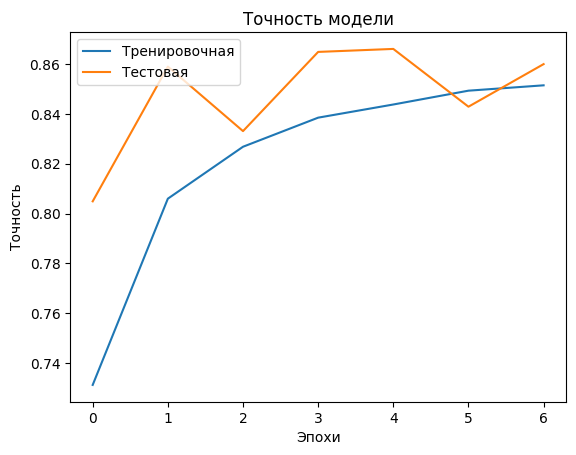

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

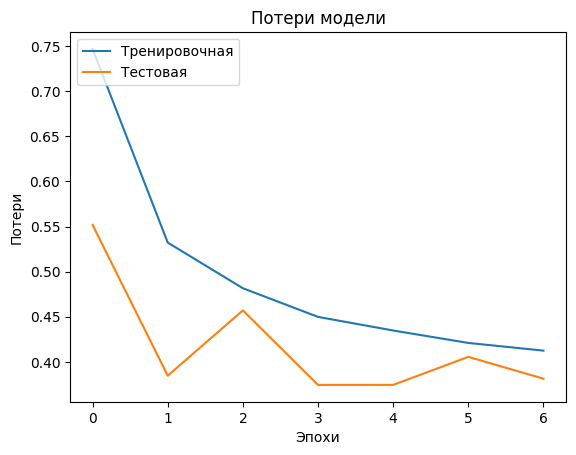

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

Вывод информации о модели

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

Что мы сделали:
1. Увеличили количество эпох до 15.
2. Добавили Dropout.
3. Добавили Early Stopping.
4. Заменили оптимизатор Adam на RMSprop.
5. Добавили аугментацию данных.


Вывод: 
Из результатов видно, что увеличение количества эпох до 15, добавление Dropout и аугментации данных привели к ухудшению результатов на валидационном наборе данных. На эпохе 4 начали проявляться признаки переобучения модели.